In [2]:
pip install pdfplumber

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pypdf

In [ ]:
from pypdf import PdfReader

def extract_all_text_pypdf(path):
    reader = PdfReader(path)
    return "\n".join(page.extract_text() or "" for page in reader.pages)

text = extract_all_text_pypdf(r"H:\python_L\pdf analysi\merged_swiggy.pdf")
print(text[:1000]) 


TAX INVOICE
Invoice From : Swiggy Limited (formerly known 
as Swiggy Private Limited and 
Bundl Technologies Private 
Limited)
IRN : 766f2de785453717bd7194b0335b80c7cd39b341518a9e4ae5b883d17874aea8
PAN : AAFCB7707D Invoice Number : 250409FS29010820
Email ID : invoice@swiggy.in Invoice Date : 2025-04-09 19:28:12
GSTIN : 29AAFCB7707D1ZQ Service Period : 01/04/2025 to 05/04/2025
Address : No 55, Sy No 8 to 14, I & J block, 
Ground Floor, Embassy Tech 
village, Outer Ring Road, 
Devarbisanahalli, Varthur, 
Bengaluru - 560103.
Invoice Type : INV
Original Invoice 
No:
-
Original Invoice 
Date:
-
Pincode : 560103 PO Number : -
State Code : 29 QR CODE :
Invoice To :
Legal Name : MANN HOSPITALITY LLP
Restaurant / Store Name :Alpha Biryani
Restaurant / Store ID : 408
GSTIN : 29ABNFM9601R1Z9
Address : SY No 166, Mann Food Court, Ak 
Gopalan Colony Road, Near Hope 
Farm, Whitefield Bangalore - 
560066
City : Bangalore
Pincode : 560066
State Code : 29
Sr. 
no.
Description HSN
Unit of 
measure
Quant

In [ ]:
print (text)

text = extract_all_text_pypdf(r"H:\python_L\pdf analysi\merged_swiggy.pdf")


with open("merged_swiggy.txt", "w", encoding="utf-8") as f:
    f.write(text)

print("Text saved to merged_swiggy.txt ✅")


TAX INVOICE
Invoice From : Swiggy Limited (formerly known 
as Swiggy Private Limited and 
Bundl Technologies Private 
Limited)
IRN : 766f2de785453717bd7194b0335b80c7cd39b341518a9e4ae5b883d17874aea8
PAN : AAFCB7707D Invoice Number : 250409FS29010820
Email ID : invoice@swiggy.in Invoice Date : 2025-04-09 19:28:12
GSTIN : 29AAFCB7707D1ZQ Service Period : 01/04/2025 to 05/04/2025
Address : No 55, Sy No 8 to 14, I & J block, 
Ground Floor, Embassy Tech 
village, Outer Ring Road, 
Devarbisanahalli, Varthur, 
Bengaluru - 560103.
Invoice Type : INV
Original Invoice 
No:
-
Original Invoice 
Date:
-
Pincode : 560103 PO Number : -
State Code : 29 QR CODE :
Invoice To :
Legal Name : MANN HOSPITALITY LLP
Restaurant / Store Name :Alpha Biryani
Restaurant / Store ID : 408
GSTIN : 29ABNFM9601R1Z9
Address : SY No 166, Mann Food Court, Ak 
Gopalan Colony Road, Near Hope 
Farm, Whitefield Bangalore - 
560066
City : Bangalore
Pincode : 560066
State Code : 29
Sr. 
no.
Description HSN
Unit of 
measure
Quant

In [ ]:
import re
import csv


with open("merged_swiggy.txt", "r", encoding='utf-8') as f:
    text = f.read()


invoices = text.split("TAX INVOICE")[1:]  


output_rows = []

for invoice in invoices:
    try:
        invoice_number = re.search(r"Invoice Number\s*:\s*(\S+)", invoice).group(1)
        invoice_date = re.search(r"Invoice Date\s*:\s*(.*)", invoice).group(1).strip()
        restaurant_name = re.search(r"Restaurant / Store Name\s*:\s*(.*)", invoice).group(1).strip()
        restaurant_id = re.search(r"Restaurant / Store ID\s*:\s*(\d+)", invoice).group(1)
        base_amount = re.search(r"ValDtls_AssVal\s*:\s*([0-9.]+)", invoice).group(1)
        cgst = re.search(r"ValDtls_CgstVal\s*:\s*([0-9.]+)", invoice).group(1)
        sgst = re.search(r"ValDtls_SgstVal\s*:\s*([0-9.]+)", invoice).group(1)
        discount = re.search(r"Other Charges - Reimbursement\s*of Discount\s*([0-9.]+)", invoice).group(1)
        grand_total = re.search(r"Grand Total\s*([0-9.]+)", invoice).group(1)

        output_rows.append([
            invoice_number, invoice_date, restaurant_name, restaurant_id,
            base_amount, cgst, sgst, discount, grand_total
        ])
    except AttributeError:
        
        continue


with open("swiggy_invoices.csv", "w", newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Invoice Number", "Invoice Date", "Restaurant Name", "Restaurant ID",
                     "Base Amount", "CGST", "SGST", "Discount", "Grand Total"])
    writer.writerows(output_rows)

print("CSV created successfully.")


CSV created successfully.


In [9]:
import pandas as pd


df = pd.read_csv("swiggy_invoices.csv")


print("Number of invoices:", len(df))
print("Total Grand Total:", df["Grand Total"].astype(float).sum())
print("Average Base Amount:", df["Base Amount"].astype(float).mean())
print("Top 5 Restaurants by Invoice Count:")
print(df["Restaurant Name"].value_counts().head())


print("\nSummary statistics:")
print(df.describe())

Number of invoices: 12
Total Grand Total: 306.448
Average Base Amount: 6580.245
Top 5 Restaurants by Invoice Count:
Restaurant Name
Alpha Biryani                1
Dilli Darbar                 1
Biryani Box                  1
Roj Ka Khana(Daily Meals)    1
Chinese Chaska               1
Name: count, dtype: int64

Summary statistics:
       Restaurant ID   Base Amount         CGST         SGST   Discount  \
count      12.000000     12.000000    12.000000    12.000000  12.000000   
mean   324662.500000   6580.245000   592.220833   592.220833  14.233333   
std    212167.735466   7408.599241   666.773660   666.773660  21.511914   
min       408.000000     36.990000     3.330000     3.330000   1.000000   
25%    180799.750000   2118.217500   190.637500   190.637500   3.000000   
50%    321974.000000   3497.165000   314.745000   314.745000   6.500000   
75%    476605.000000   9647.657500   868.287500   868.287500  13.500000   
max    600278.000000  25587.010000  2302.830000  2302.830000  78.8

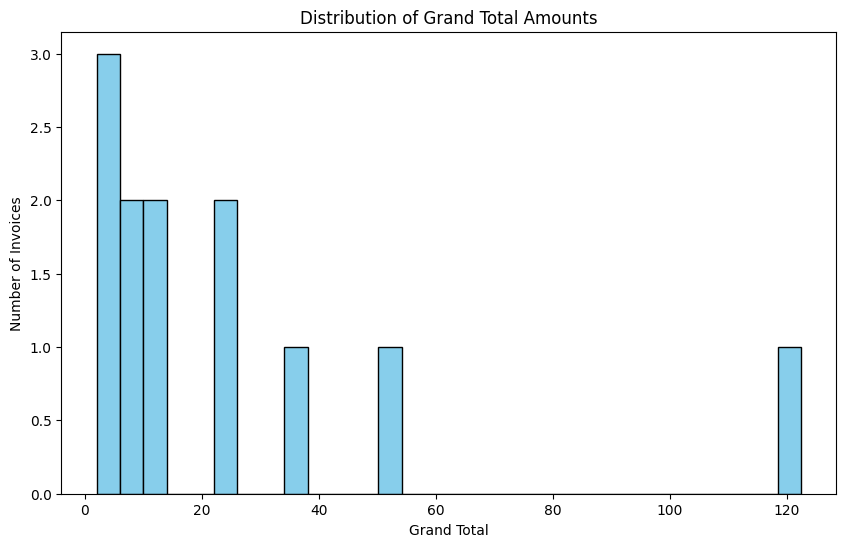

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
df["Grand Total"] = df["Grand Total"].astype(float)
plt.hist(df["Grand Total"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Grand Total Amounts")
plt.xlabel("Grand Total")
plt.ylabel("Number of Invoices")
plt.show()

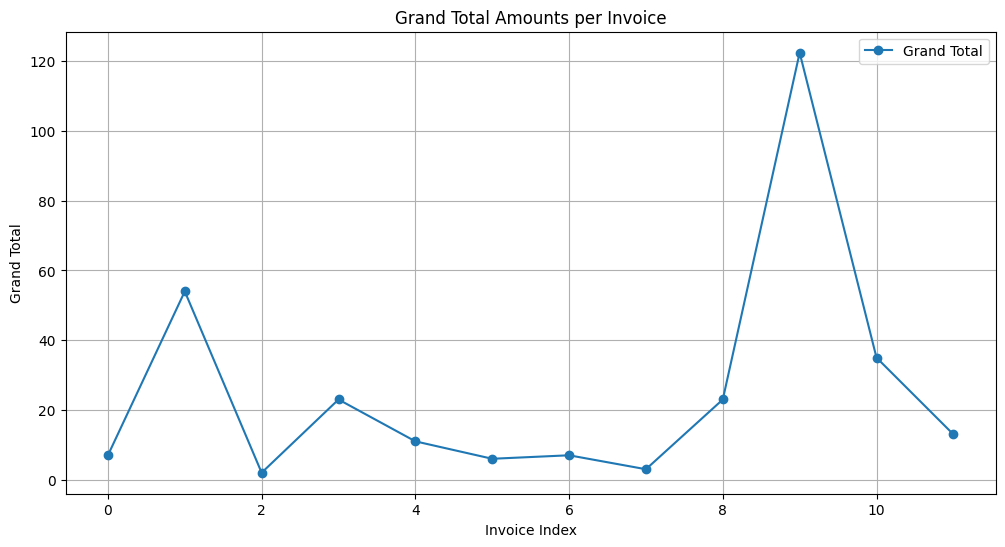

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df["Grand Total"].values, label="Grand Total", marker='o')
plt.title("Grand Total Amounts per Invoice")
plt.xlabel("Invoice Index")
plt.ylabel("Grand Total")
plt.legend()
plt.grid(True)
plt.show()